# Grid search

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Load dataset
X, y = load_iris(return_X_y=True)

# Parameter grid
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3, 'min_samples_split': 5}


### Heat map of performance and hyperparameter grid

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=25; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=25; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=25; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=2, n_e

<ipython-input-2-b6ae1da22ac5>:36: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pivot_table = results_filtered.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')
<ipython-input-2-b6ae1da22ac5>:36: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pivot_table = results_filtered.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')


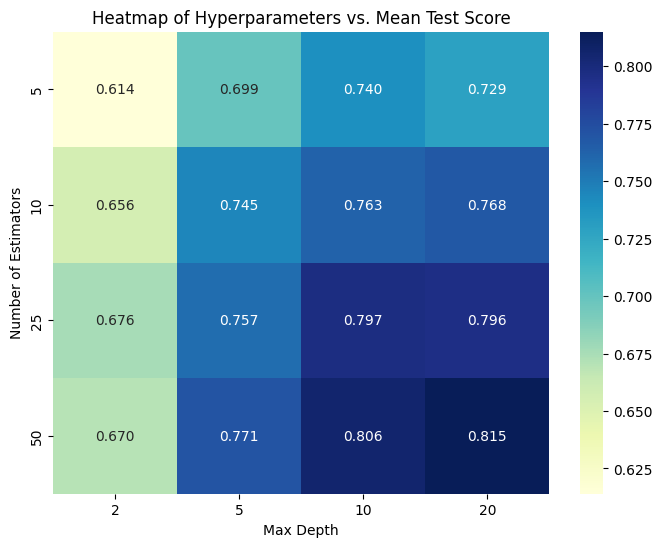

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a more complex synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=10, n_redundant=10,
                           n_classes=3, random_state=42)

# Define the model
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [5, 10, 25, 50],
    'max_depth': [2, 5, 10, 20]
}

# Initialize Grid Search
grid_search = GridSearchCV(model, param_grid, cv=3, verbose=2)

# Fit Grid Search
grid_search.fit(X, y)

# Extracting the results
results = pd.DataFrame(grid_search.cv_results_)

# Focusing on necessary columns
required_columns = ['param_n_estimators', 'param_max_depth', 'mean_test_score']
results_filtered = results[required_columns]

# Pivoting the DataFrame for the heatmap
pivot_table = results_filtered.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Heatmap of Hyperparameters vs. Mean Test Score")
plt.xlabel("Max Depth")
plt.ylabel("Number of Estimators")
plt.show()